<a href="https://colab.research.google.com/github/sh3986/kaggle/blob/main/main_v1_keras_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Library

In [2]:
import numpy as np 
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:.5f}".format

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import optimizers
tf.__version__

'2.8.2'

In [3]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from tensorflow.keras.utils import plot_model

# Splitting data
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning
import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

TensoFlow Version:  2.8.2


In [4]:
data_path = "/content/drive/MyDrive/Colab Notebooks/Kaggle/project_2_cnn"

In [5]:
import os
os.chdir(data_path)

In [6]:
data = []
labels = []

height = 32
width = 32
channels = 3
num_classes = 43

In [7]:
# for i in range(num_classes) :
#     path = f'./data/Train/{i}/'
#     Class = os.listdir(path)
#     for a in Class:
#         image = cv2.imread(path + a)
#         image_from_array = Image.fromarray(image, 'RGB')
#         size_image = image_from_array.resize((height, width))
#         data.append(np.array(size_image))
#         labels.append(i)

# data = np.array(data)
# labels = np.array(labels)

In [8]:
# import pickle
# with open("/content/drive/MyDrive/Colab Notebooks/Kaggle/project_2_cnn/data/train_data.pkl","wb") as f:
#     pickle.dump(data, f)

In [9]:
# with open("/content/drive/MyDrive/Colab Notebooks/Kaggle/project_2_cnn/data/train_label.pkl","wb") as f:
#     pickle.dump(labels, f)

In [10]:
print(data.shape)
print(labels.shape)

(26010, 32, 32, 3)
(26010,)


### 데이터 로드

In [11]:
X = data
y = tf.one_hot(labels, num_classes).numpy()

In [12]:
print(X.shape)
print(y.shape)

(26010, 32, 32, 3)
(26010, 43)


### 탐색 분석

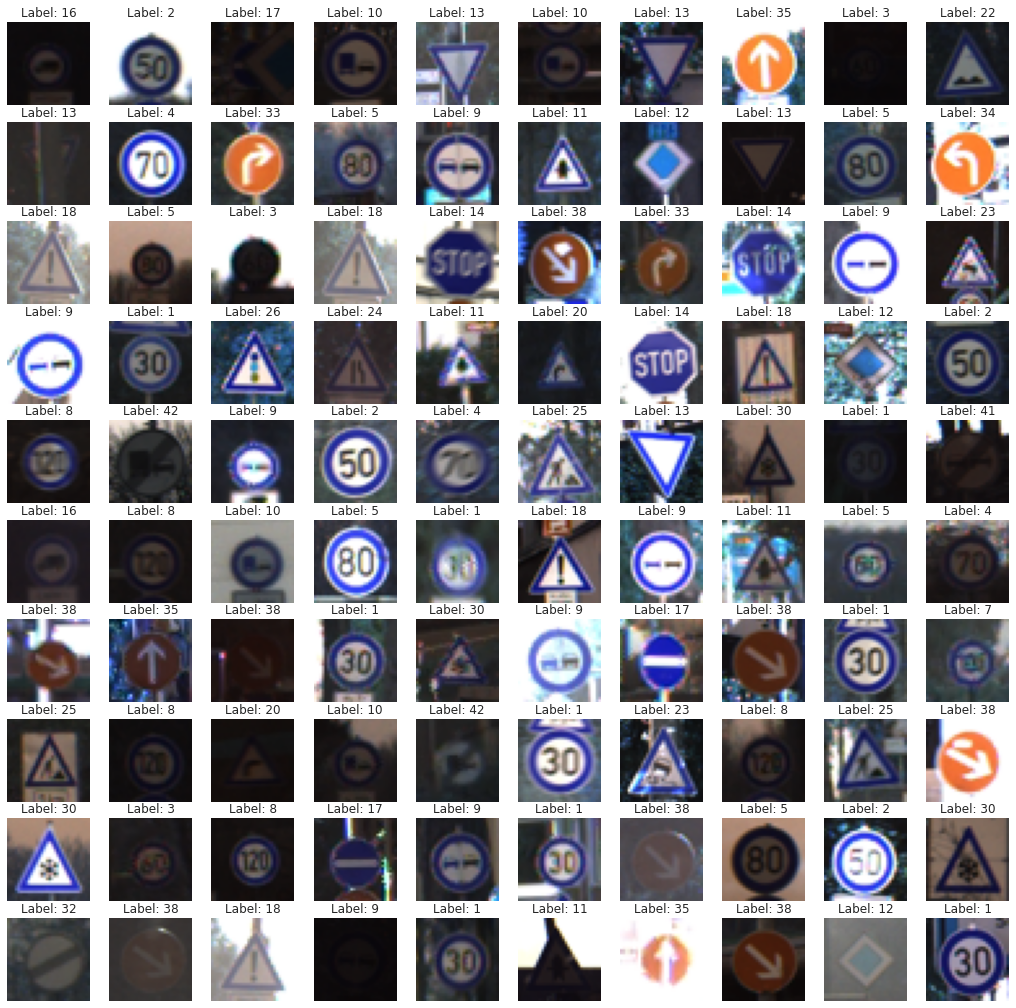

In [ ]:
fig, axes = plt.subplots(10,10, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X.shape[0])
    ax.imshow(X[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Label: '+str(np.argmax(y[r])))

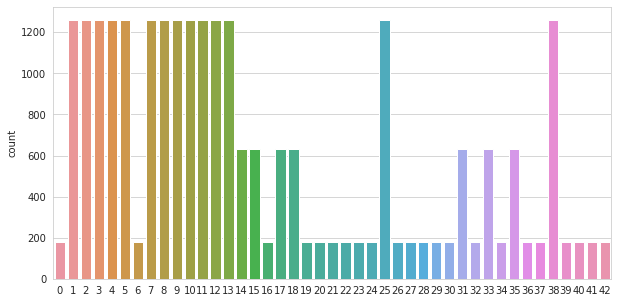

In [29]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(labels)

In [ ]:
uni_pattern = np.unique(y_train, return_counts=True)
idxs = uni_pattern[0]
ratios = uni_pattern[1]/len(y_train)

In [ ]:
def show_image(img, label):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5, 5))
    ax.imshow(img)
    ax.set_title(label, fontsize=10)

In [ ]:
def show_label_image(data, label, select):
    fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
    img = data[np.argwhere(label==select).reshape(-1)]
    print(img.shape)
    for i in range(10):
        ax[i].imshow(img[i])
        ax[i].set_title(select, fontsize=10)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.tight_layout()
    plt.show() 

(1008, 30, 30, 3)


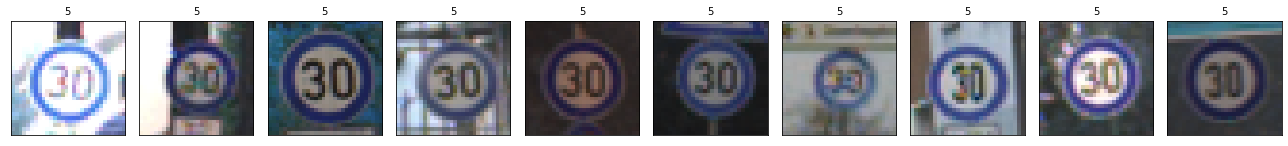

In [ ]:
show_label_image(X_train, y_train, 5)

### 전처리

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [15]:
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))

Train Shape: (20808, 32, 32, 3)
Test Shape : (5202, 32, 32, 3)


### 모델 생성

In [ ]:
# input image dimensions
img_rows, img_cols = 32, 32
# The images are RGB.
img_channels = 3
nb_classes = 43

In [ ]:
resnet = ResNet50(weights= None, include_top=False, input_shape= (img_rows,img_cols,img_channels))

In [ ]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(nb_classes, activation= 'softmax')(x)
model = Model(inputs = resnet.input, outputs = predictions)

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=350)

### 모델 학습

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
csv_logger = CSVLogger('train_log.csv', separator=',')

In [ ]:
n_epochs = 50
history =  model.fit(X_train, y_train,  
            batch_size = 32, epochs = n_epochs, verbose = 1, 
            validation_data = (X_test, y_test), 
            callbacks = [model_check, early, reduce_lr, csv_logger])

Epoch 1/50
651/651 [==============================] - 43s 43ms/step - loss: 3.6128 - accuracy: 0.2606 - val_loss: 2.4001 - val_accuracy: 0.3122 - lr: 0.0010
Epoch 2/50
651/651 [==============================] - 25s 39ms/step - loss: 2.9916 - accuracy: 0.3896 - val_loss: 32.7285 - val_accuracy: 0.1559 - lr: 0.0010
Epoch 3/50
651/651 [==============================] - 25s 38ms/step - loss: 3.6044 - accuracy: 0.2573 - val_loss: 10.0800 - val_accuracy: 0.0609 - lr: 0.0010
Epoch 4/50
651/651 [==============================] - 25s 38ms/step - loss: 3.8292 - accuracy: 0.1511 - val_loss: 6.9485 - val_accuracy: 0.1997 - lr: 0.0010
Epoch 5/50
651/651 [==============================] - 25s 38ms/step - loss: 2.6695 - accuracy: 0.3427 - val_loss: 6843.5400 - val_accuracy: 0.0565 - lr: 0.0010
Epoch 6/50
651/651 [==============================] - 28s 43ms/step - loss: 2.3398 - accuracy: 0.4419 - val_loss: 1.5818 - val_accuracy: 0.5434 - lr: 0.0010
Epoch 7/50
651/651 [==============================] -

In [21]:
model_name = "TSC_model_resnet.h5"

In [ ]:
model.save(model_name)

### 모델 평가

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

163/163 [==============================] - 2s 13ms/step - loss: 0.0440 - accuracy: 0.9900
Accuracy:  0.9900038242340088 
Loss    :  0.04398960992693901


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1).numpy()

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.97      0.99      0.98       255
           2       0.99      0.98      0.99       273
           3       0.97      1.00      0.98       255
           4       1.00      0.97      0.98       263
           5       1.00      0.97      0.98       249
           6       0.95      1.00      0.97        35
           7       0.96      0.99      0.98       231
           8       0.99      0.98      0.98       212
           9       1.00      1.00      1.00       236
          10       1.00      1.00      1.00       250
          11       1.00      0.99      0.99       247
          12       1.00      1.00      1.00       254
          13       1.00      1.00      1.00       254
          14       1.00      0.99      1.00       151
          15       1.00      1.00      1.00       118
          16       1.00      1.00      1.00        40
          17       0.99    

In [ ]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred, labels=range(9)))

[[ 26   0   0   0   0   0   0   0   0]
 [  0 252   1   1   0   0   0   1   0]
 [  0   3 267   1   0   0   0   2   0]
 [  0   0   0 254   0   0   0   0   1]
 [  0   5   0   0 256   0   0   1   1]
 [  0   1   0   3   0 242   1   1   0]
 [  0   0   0   0   0   0  35   0   0]
 [  0   0   0   0   0   1   0 229   1]
 [  0   0   1   0   0   0   0   4 207]]


In [ ]:
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Loss')
plt.xlabel('#epochs')
plt.ylabel('Training')
plt.legend();

### 모델 테스트

In [22]:
from tensorflow import keras 
model = keras.models.load_model(model_name)

### 테스트 데이터 예측

In [16]:
# test_data = []
# file_name = []
# path = f'./data/Test/'
# Class = os.listdir(path)
# for a in Class:
#     image = cv2.imread(path + a)
#     image_from_array = Image.fromarray(image, 'RGB')
#     size_image = image_from_array.resize((height, width))
#     test_data.append(np.array(size_image))
#     file_name.append(a)

# test_data = np.array(test_data)
# file_name = np.array(file_name)

In [17]:
# import pickle 

# with open('./data/test_data.pkl', 'wb') as f:
#     pickle.dump(test_data, f)

# with open('./data/file_name.pkl', 'wb') as f:
#     pickle.dump(file_name, f)

In [ ]:
with open('./data/test_data.pkl', 'rb') as f:
    test_data = pickle.load(f)

with open('./data/file_name.pkl', 'rb') as f:
    file_name = pickle.load(f)

In [23]:
test_data.shape

(8670, 32, 32, 3)

In [26]:
y_test = model.predict(test_data)
y_test = tf.argmax(y_test, axis=1).numpy()

In [44]:
index = list(range(10))
np.random.choice(index, 100)

array([1, 8, 5, 9, 1, 7, 3, 0, 6, 0, 1, 0, 2, 7, 2, 7, 1, 9, 6, 6, 7, 5,
       7, 5, 3, 8, 2, 2, 4, 3, 1, 3, 0, 1, 7, 0, 2, 2, 7, 3, 0, 4, 7, 6,
       9, 8, 8, 9, 1, 0, 2, 0, 1, 7, 3, 3, 6, 0, 7, 8, 2, 9, 5, 5, 9, 2,
       3, 0, 3, 5, 6, 3, 9, 3, 2, 2, 6, 0, 4, 8, 9, 5, 1, 4, 2, 6, 5, 9,
       7, 2, 1, 7, 8, 0, 0, 6, 6, 0, 6, 5])

In [45]:
def show_label_image(data, label, select):
    fig, axes = plt.subplots(nrows = 10, ncols = 10, figsize=(18, 18))
    img = data[np.argwhere(label==select).reshape(-1)]
    index = np.random.choice(list(range(len(img))), 100)
    for i, ax in enumerate(axes.flat):
        r = index[i]
        ax.imshow(img[r])
        ax.set_title(select, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show() 

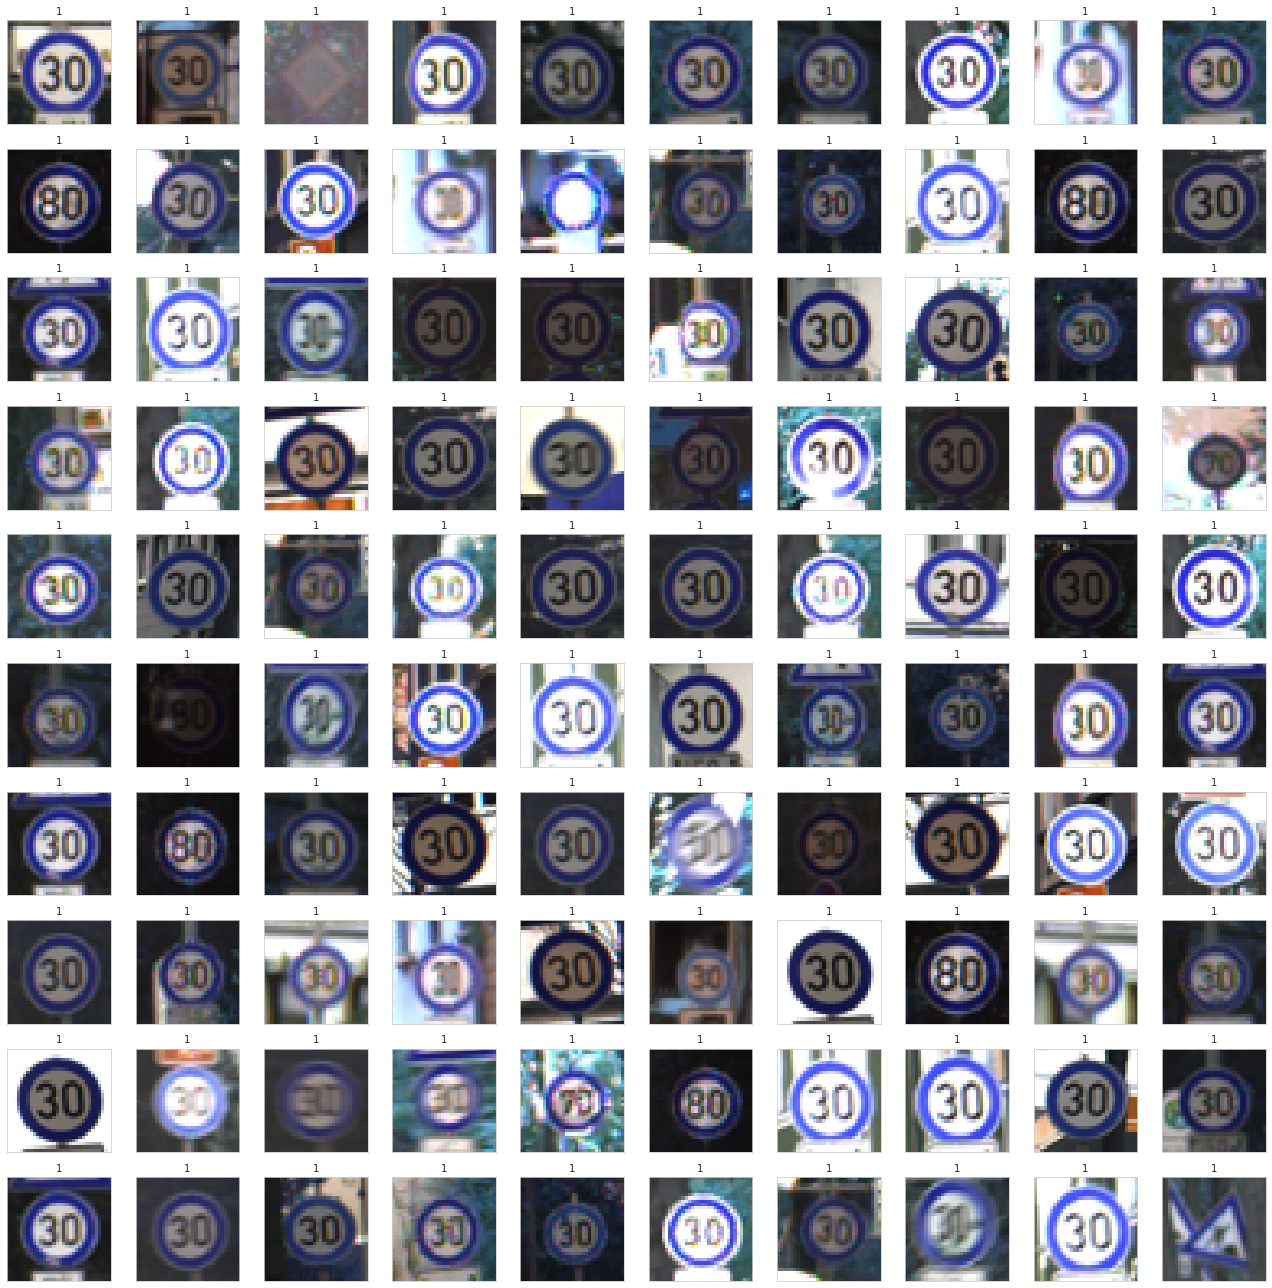

In [46]:
show_label_image(test_data, y_test, 1)

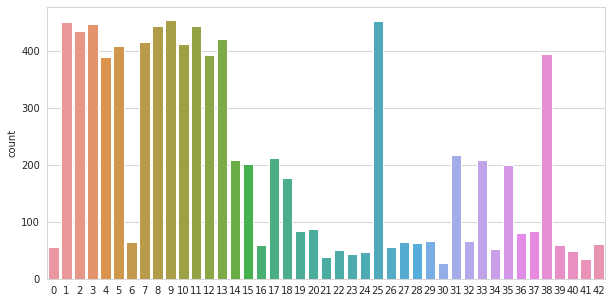

In [30]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y_test)

In [ ]:
csv_data = pd.DataFrame(np.concatenate((file_name.reshape(-1, 1), y_test.reshape(-1,1)), axis=1))

In [ ]:
csv_data = csv_data.sort_values(by=[0])
csv_data.head()

,0,1
279,00000.png,5
8119,00001.png,5
3628,00002.png,38
1565,00003.png,33
5360,00004.png,5


In [ ]:
csv_data.to_csv("predicted_output.csv", header=False, index=False)

### 주석